#1. 이진 분류기 설계 : Binary Classifier

###1.0 Logical AND/OR

In [ ]:
import numpy as np
import matplotlib.pylab as plt

np.random.seed(2022)

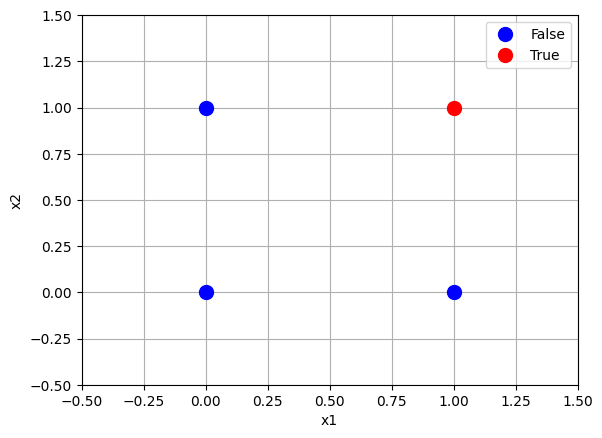

In [ ]:
################## Logical AND ##################

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

AND = (X, Y)

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20, label = "False")
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

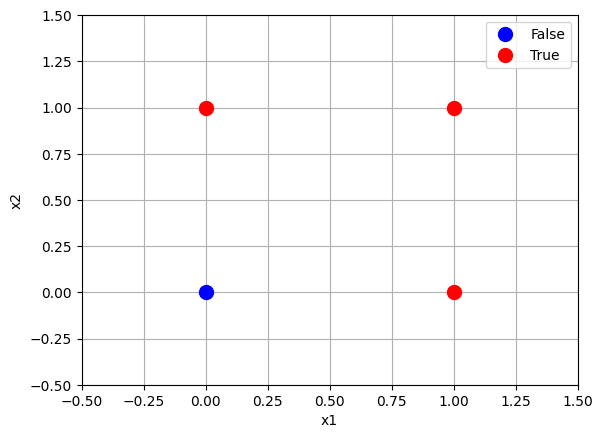

In [ ]:
################## Logical OR ##################

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

OR = (X, Y)

plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

###1.1 **선형** 활성화 함수를 통한 분류기 : 아달린
[3강] 로지스틱회귀.pdf p.3-

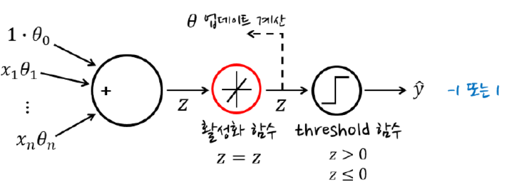

In [ ]:
def binary_classifier_linear(x, theta):

  z = x.dot(theta)
  z = z

  y_hat = (z >= 0.5).astype(int)
  return y_hat

In [ ]:
z= X_.dot(theta)
z
print(z)
y_hat = (z>= 0.5).astype(int)
y_hat

[[0.4386244 ]
 [0.5424815 ]
 [0.25586653]
 [0.35972362]]


array([[0],
       [1],
       [0],
       [0]])

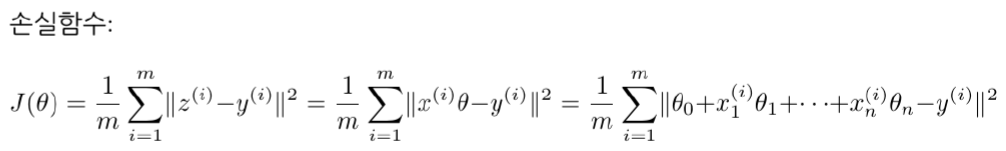

In [ ]:
# 평균 제곱 오차 Mean Square Error(MSE)
# [4강] 선형회귀.pdf p.29
def mean_square_error(y_hat, y):
  ################## Fill Your Code! ##################
  return np.mean((y_hat - y)**2)
  #####################################################

먼저, AND연산에 대한 선형 분류기를 만들어 보자.

In [ ]:
X, Y = AND
print("X : ")
print(X)
print("Y : ")
print(Y)

X : 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Y : 
[[0]
 [0]
 [0]
 [1]]


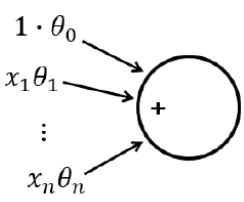

AND / OR 에서는 [$x_1, x_2$] 두개의 입력이 들어간다.

이 때, bias team이 추가될 수 있도록 데이터에 1을 padding해 주어야 한다.

In [ ]:
################## Fill Your Code! ##################
# hint : np.c_ / np.ones
X_ = np.c_[np.ones(X.shape[0]), X]
#####################################################
print(X_)

[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


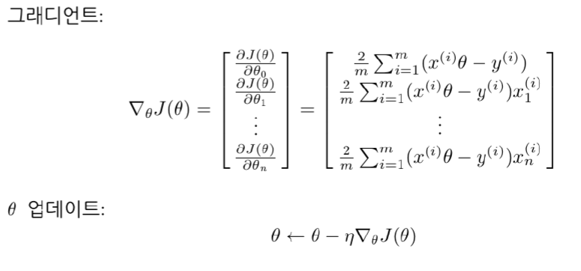

theta [[1.98468616]
 [0.28210933]
 [0.76080866]]
Y_hat:  [[1.98468616]
 [2.74549482]
 [2.26679548]
 [3.02760414]]
theta [[1.53345713]
 [0.06738934]
 [0.52215371]]
Y_hat:  [[1.53345713]
 [2.05561084]
 [1.60084647]
 [2.12300018]]
theta [[ 1.2178114 ]
 [-0.06880299]
 [ 0.36322316]]
Y_hat:  [[1.2178114 ]
 [1.58103456]
 [1.14900841]
 [1.51223157]]
theta [[ 0.9948071 ]
 [-0.15186499]
 [ 0.25855985]]
Y_hat:  [[0.9948071 ]
 [1.25336695]
 [0.84294211]
 [1.10150197]]
theta [[ 0.83517619]
 [-0.19908719]
 [ 0.19081641]]
Y_hat:  [[0.83517619]
 [1.0259926 ]
 [0.636089  ]
 [0.82690541]]
theta [[ 0.71896803]
 [-0.22223691]
 [ 0.14817151]]
Y_hat:  [[0.71896803]
 [0.86713954]
 [0.49673112]
 [0.64490263]]
theta [[ 0.63258097]
 [-0.2293186 ]
 [ 0.1225694 ]]
Y_hat:  [[0.63258097]
 [0.75515037]
 [0.40326237]
 [0.52583177]]
theta [[ 0.56673969]
 [-0.22577331]
 [ 0.10852029]]
Y_hat:  [[0.56673969]
 [0.67525999]
 [0.34096639]
 [0.44948668]]
theta [[ 0.51511706]
 [-0.21529596]
 [ 0.10228296]]
Y_hat:  [[0.515117

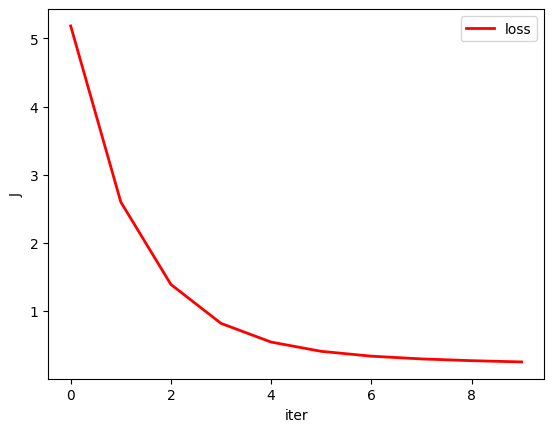

In [ ]:
eta = 0.1
n_iterations = 10
(m, n) = X_.shape       # m : num of data / n : dim of data
################## Fill Your Code! ##################
theta = np.random.randn(n,1)
#####################################################

J_hist = []
for iteration in range(n_iterations):
  ################## Fill Your Code! ##################
  Y_hat = X_.dot(theta)
  #
  print("theta", theta)
  print("Y_hat: ", Y_hat)
  gradients = 2/m * X_.T.dot(Y_hat - Y)
  theta = theta - eta * gradients
  #####################################################
  J = mean_square_error(Y_hat, Y)
  J_hist.append(J)

theta_lin = theta

# plot J history
plt.plot(J_hist, 'r', linewidth = 2, label = "loss")
plt.xlabel("iter")
plt.ylabel("J")
plt.legend()
plt.show()

In [ ]:
Y_hat = binary_classifier_linear(X_,theta)
print(X_.dot(theta).T)
print(Y_hat.T)
print(Y.T)

[[-0.25  0.25  0.25  0.75]]
[[0 0 0 1]]
[[0 0 0 1]]


900
900


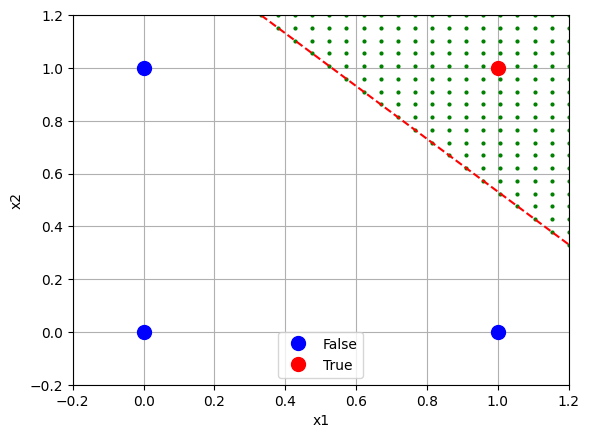

In [ ]:
num_of_samples = 30
(m, n) = X_.shape

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = 1
    X_new[i*num_of_samples + j, 1] = x1[i]
    X_new[i*num_of_samples + j, 2] = x2[j]

Y_hat = binary_classifier_linear(X_new, theta)
print(Y_hat.size)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
print(Y_hat.size)
plt.plot(X_new[Y_hat == 1][:, 1], X_new[Y_hat == 1][:, 2], 'g.', markersize = 4)

idx1 = np.where(X_new[Y_hat == 1][:, 1] == min(X_new[Y_hat == 1][:, 1]))[0][0]
# idx2 = np.where(X_new[Y_hat == 1][:, 1] == max(X_new[Y_hat == 1][:, 1]))[0][0]
plt.plot([X_new[Y_hat == 1][:, 1][idx1], X_new[Y_hat == 1][:, 2][idx1]], [X_new[Y_hat == 1][:, 2][idx1], X_new[Y_hat == 1][:, 1][idx1]], 'r--')

plt.plot(X[:-1, 0], X[:-1, 1], 'b.', markersize=20, label = "False")
plt.plot(X[-1, 0], X[-1, 1], 'r.', markersize=20, label = "True")

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

###1.2 **시그모이** 활성화 함수를 통한 분류기
[2강] 선형회귀.pdf p.18-27

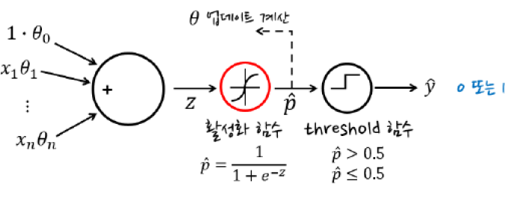

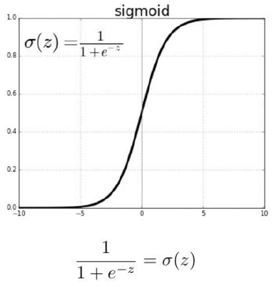

In [ ]:
# [6강] 로지스틱회귀_v2.pdf p.11
def sigmoid(z):
  ################## Fill Your Code! ##################
  return 1 / (1 + np.exp(-z))
  #####################################################

In [ ]:
def binary_classifier_logistic(x, theta):
  ################## Fill Your Code! ##################
  z = x.dot(theta)
  p_hat = sigmoid(z)
  #####################################################
  y_hat = (p_hat >= 0.5).astype(int)
  return y_hat

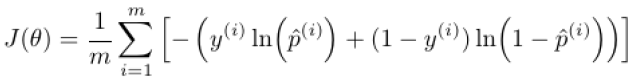

In [ ]:
# 크로스 엔트로피
# [4강] 선형회귀.pdf p.29
def cross_entropy_binary(p_hat, y):
  ################## Fill Your Code! ##################
  return - np.mean(y*np.log(p_hat) + (1-y)*np.log(1-p_hat))
  #####################################################

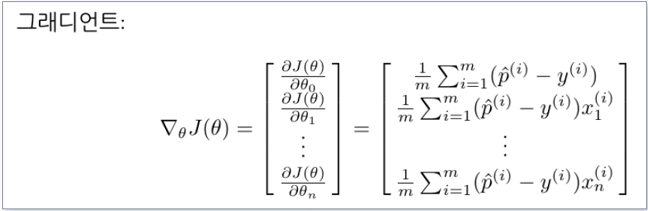

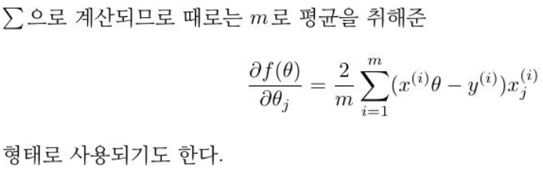

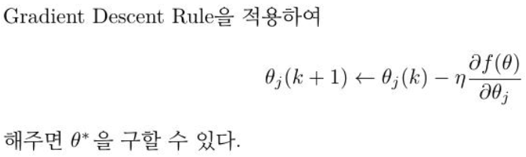

In [ ]:
X, Y = OR
X_ = np.c_[np.ones(X.shape[0]), X]
print("X_ : ")
print(X_)
print("Y : ")
print(Y)

X_ : 
[[1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]
Y : 
[[0]
 [1]
 [1]
 [1]]


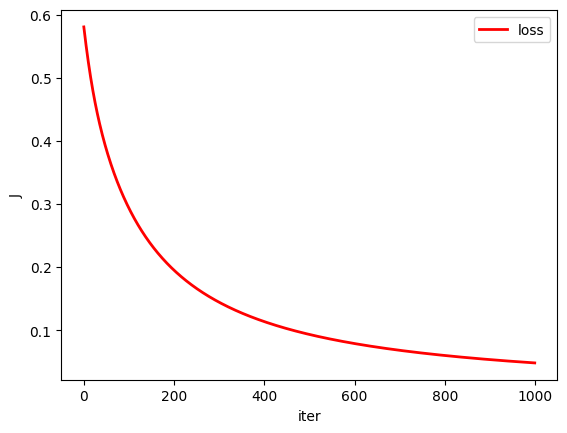

In [ ]:
eta = 0.1
n_iterations = 1000
(m, n) = X_.shape # m : num of data / n : dim of data
################## Fill Your Code! ##################
theta = np.random.randn(n,1)
#####################################################

J_hist = []
for iteration in range(n_iterations):
  ################## Fill Your Code! ##################
  P_hat = sigmoid(X_.dot(theta))
  gradients = 2/m * X_.T.dot(P_hat - Y)
  theta = theta - eta * gradients
  #####################################################
  J = cross_entropy_binary(P_hat, Y)
  J_hist.append(J)

theta_log = theta

# plot J history
plt.plot(J_hist, 'r', linewidth = 2, label = "loss")
plt.xlabel("iter")
plt.ylabel("J")
plt.legend()
plt.show()

In [ ]:
Y_hat = binary_classifier_logistic(X_, theta)
print(sigmoid(X_.dot(theta).T))
print(Y_hat.T)
print(Y.T)

[[0.10307223 0.95943732 0.95904397 0.99979256]]
[[0 1 1 1]]
[[0 1 1 1]]


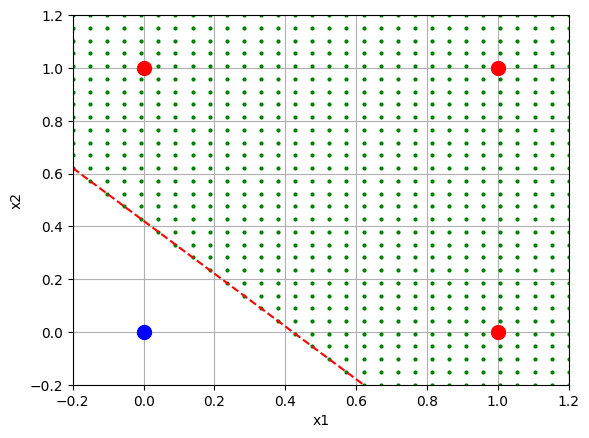

In [ ]:
num_of_samples = 30
(m, n) = X_.shape # m : num of data / n : dim of data

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = 1
    X_new[i*num_of_samples + j, 1] = x1[i]
    X_new[i*num_of_samples + j, 2] = x2[j]

Y_hat = binary_classifier_logistic(X_new, theta)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
plt.plot(X_new[Y_hat == 1][:, 1], X_new[Y_hat == 1][:, 2], 'g.', markersize = 4)

idx1 = np.where(X_new[Y_hat == 1][:, 1] == min(X_new[Y_hat == 1][:, 1]))[0][0]
idx2 = np.where(X_new[Y_hat == 1][:, 1] == max(X_new[Y_hat == 1][:, 1]))[0][0]
plt.plot([X_new[Y_hat == 1][:, 1][idx1], X_new[Y_hat == 1][:, 2][idx1]], [X_new[Y_hat == 1][:, 2][idx1], X_new[Y_hat == 1][:, 1][idx1]], 'r--')

plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20, label = "True")

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 1.3 Linear Classifier VS Logistic Classifier

이 챕터에서는 linear classifier와 logistic classifier에 의해 그려지는 3차원 공간을 확인한다.

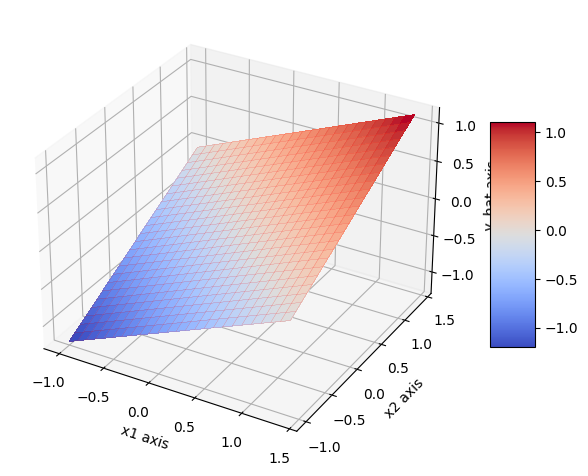

In [ ]:
X1 = np.arange(-1, 1.5, 0.1)
X2 = np.arange(-1, 1.5, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = np.zeros_like(X1)

for i in range(len(X1)):
  for j in range(len(X1)):
    x1 = X1[i, j]
    x2 = X2[i, j]
    x = np.array([[1, x1, x2]])
    y_hat = x@theta_lin
    Z[i, j] = y_hat

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X1,X2,Z,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(X1,X2,Z,color='r',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('y_hat axis')
plt.show()

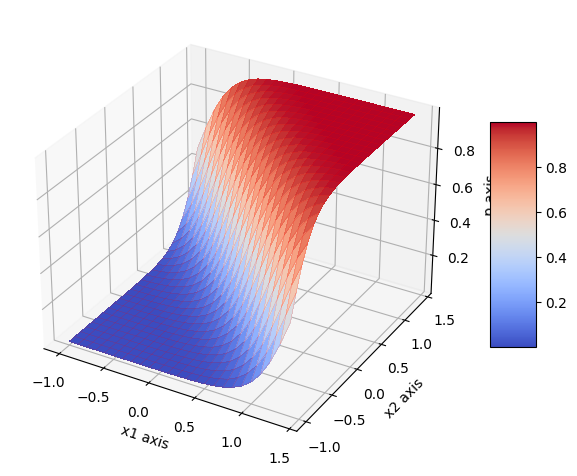

In [ ]:
X1 = np.arange(-1, 1.5, 0.1)
X2 = np.arange(-1, 1.5, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = np.zeros_like(X1)

for i in range(len(X1)):
  for j in range(len(X1)):
    x1 = X1[i, j]
    x2 = X2[i, j]
    x = np.array([[1, x1, x2]])
    y_hat = sigmoid(x@theta_log)
    Z[i, j] = y_hat

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X1,X2,Z,cmap='coolwarm',linewidth=0,antialiased=False)
wire = ax.plot_wireframe(X1,X2,Z,color='r',linewidth=0.1)
fig.colorbar(surf,shrink=0.5,aspect=5)
fig.tight_layout()
ax.set_xlabel('x1 axis')
ax.set_ylabel('x2 axis')
ax.set_zlabel('p axis')
plt.show()

#2.멀티-클래스 분류기 설계 : Multi-Class Classification
[4강]

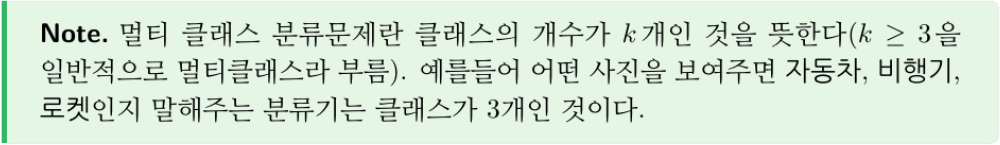

### 2.1 Example : 사분면 분류기

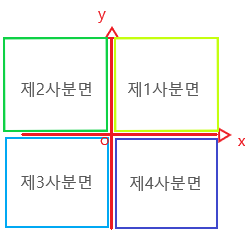

이번 멀티클래스 분류에서는 2차원 점이 몇 사분면에 포함되는지 확인하는 분류기를 만들어 볼 것이다.

In [ ]:
X = np.array([[1, 1],
              [1, 3],
              [-1, 3],
              [-3, 2],
              [-3, -2],
              [-1, -2],
              [2, -3],
              [1, -3]])

################## Fill Your Code! ##################
Y = np.array([[1],[1],[2],[2],[3],[3],[4],[4]])
#####################################################



> **One-Hot Encoding**



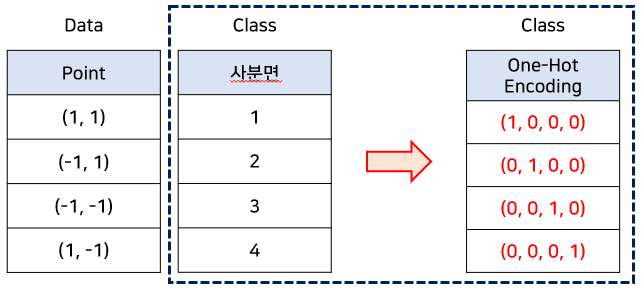

In [ ]:
## One-Hot Encoding
(m, n) = X.shape # m : num of data / n : dim of data
k = 4            # num of class

################## Fill Your Code! ##################
Y_ = np.zeros((m,k))
for i in range(m):
  Y_[i, Y[i,0]-1] = 1
#####################################################
print(Y_)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


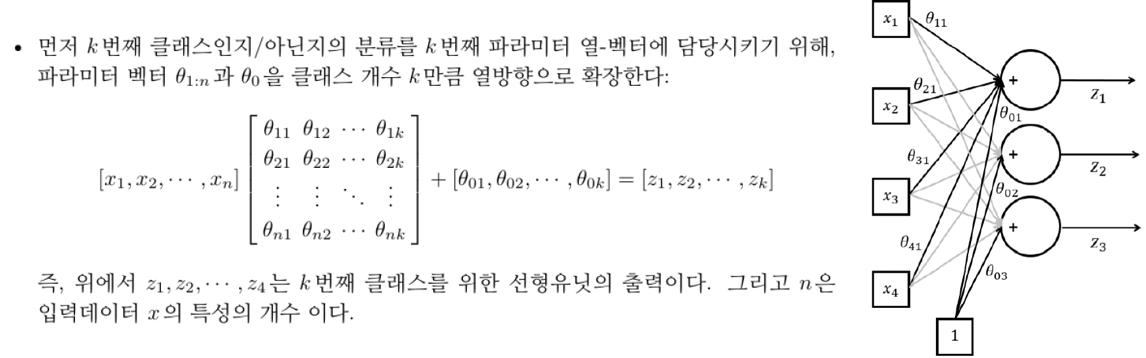

In [ ]:
## theta initialization
m, n = X.shape      # m : num of data / n : num of dim
k = len(Y_[0,:])    # k : num of class
################## Fill Your Code! ##################
theta = np.random.randn(n + 1, k)
#####################################################

In [ ]:
## z Computation Example
################## Fill Your Code! ##################
Z = X @ theta[1:] + theta[0]
#####################################################
print(Z)

[[-0.6529836  -0.74910106  2.55022119 -1.98233312]
 [-2.38048764  1.28398881  4.61814896 -3.63131757]
 [-2.20006126  5.89587534  2.33262891 -0.560009  ]
 [-1.15588285  9.49121695 -0.98685502  3.33579179]
 [ 2.29912522  5.42503721 -5.12271055  6.63376071]
 [ 2.11869883  0.81315067 -2.8371905   3.56245213]
 [ 2.71181127 -7.12122407 -0.44287432 -0.22001849]
 [ 2.80202447 -4.81528081 -1.58563434  1.31563579]]


### 2.2 Softmax

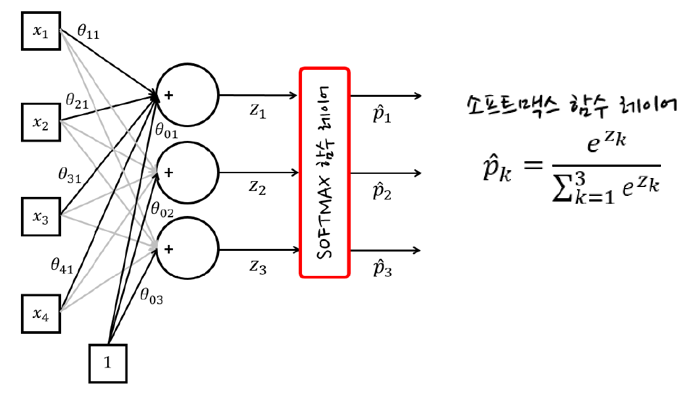

In [ ]:
# hint : np.exp / np.sum / reshape
# axis = 0 : row / axis = 1 : column
def softmax(z):
  ################## Fill Your Code! ##################
  # hint : np.exp , np.sum
  return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape((len(z), 1))
  #####################################################

In [ ]:
## p_hat Computation Example
################## Fill Your Code! ##################
P_hat = softmax(Z)
#####################################################
print(P_hat)

[[3.73353258e-02 3.39138163e-02 9.18870088e-01 9.88076993e-03]
 [8.80699565e-04 3.43787183e-02 9.64488467e-01 2.52115324e-04]
 [2.95834150e-04 9.70663940e-01 2.75150708e-02 1.52515488e-03]
 [2.37181189e-05 9.97830860e-01 2.80858839e-05 2.11733587e-03]
 [9.99216597e-03 2.27628148e-01 5.97581740e-06 7.62373710e-01]
 [1.81335734e-01 4.91463230e-02 1.27693268e-03 7.68241010e-01]
 [9.12404695e-01 4.89502055e-05 3.89157108e-02 4.86306440e-02]
 [8.07031060e-01 3.96950728e-04 1.00312312e-02 1.82540758e-01]]


In [ ]:
## Checking sum of P_hat
# hint : np.sum / axis = 1
################## Fill Your Code! ##################
print(np.sum(P_hat, axis = 1))
#####################################################

[1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
## forward : without thresh hold function
def multi_classifier_forward(x, theta):
  z = x @ theta[1:] + theta[0]
  p_hat = softmax(z)
  return p_hat

## predict : with thresh hold function
def multi_classifier_predict(x, theta):
  z = x @ theta[1:] + theta[0]
  p_hat = softmax(z)
  return 1 + np.argmax(p_hat, axis=1)

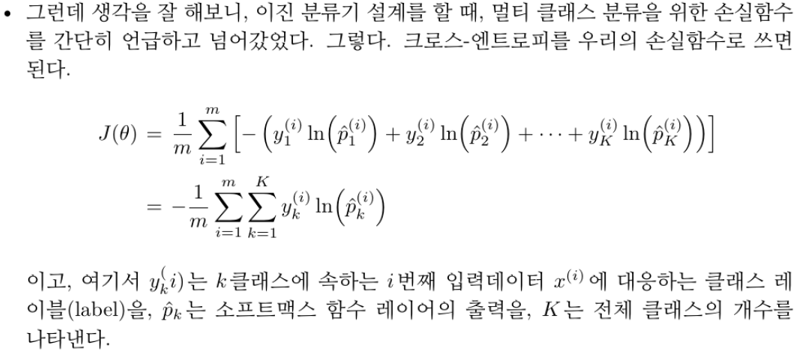

In [ ]:
def cross_entropy(x, y, theta):
  ################## Fill Your Code! ##################
  # hint : multi_classifier_forward / np.mean / np.sum / np.log
  p_hat = multi_classifier_forward(x, theta)
  J = -np.mean(np.sum((y*np.log(p_hat)),  axis = 1))
  #####################################################
  return J

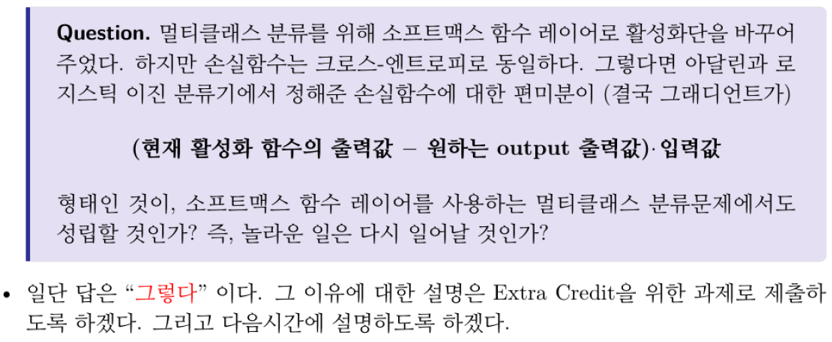

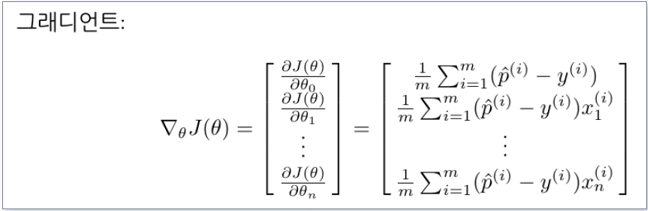

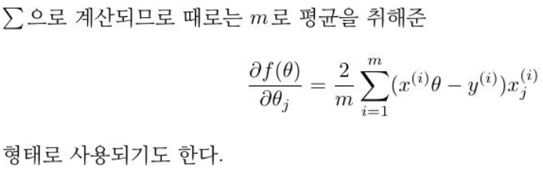

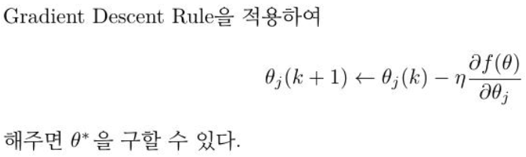

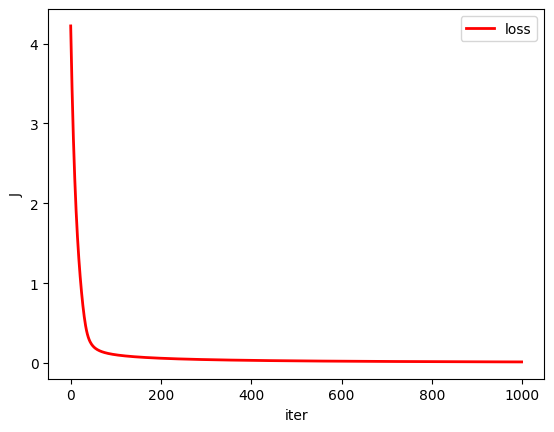

In [ ]:
J_hist = []
for i in range(1000):
  # compute cross entrophy
  J = cross_entropy(X, Y_, theta)
  J_hist.append(J)

  ################## Fill Your Code! ##################
  # compute error = Y_hat - Y_
  Y_hat = softmax(X @ theta[1:] + theta[0])
  error = Y_hat - Y_

  # gradient descent rule
  gradient_bias = np.ones((m,1)).T @ error
  gradient_theta = X.T @ error
  gradient = np.r_[gradient_bias, gradient_theta]
  theta = theta - 0.01 * gradient
  #####################################################

plt.plot(J_hist, 'r', linewidth = 2, label = "loss")
plt.xlabel("iter")
plt.ylabel("J")
plt.legend()
plt.show()

In [ ]:
## Test multi_classifier_forward
print(multi_classifier_forward(X, theta))

[[9.79032066e-01 7.53075867e-03 1.50658520e-03 1.19305902e-02]
 [9.85163345e-01 1.47816878e-02 1.30196089e-05 4.19477730e-05]
 [1.79337356e-02 9.81488707e-01 5.75802770e-04 1.75498495e-06]
 [6.95537538e-06 9.94138510e-01 5.85450789e-03 2.64641134e-08]
 [8.73327250e-08 3.28061603e-03 9.96692080e-01 2.72171398e-05]
 [2.06422115e-04 2.12586583e-03 9.69676627e-01 2.79910847e-02]
 [1.51554707e-03 5.07298910e-08 6.41539998e-04 9.97842862e-01]
 [9.80380782e-04 1.98193164e-06 2.04552949e-02 9.78562342e-01]]


In [ ]:
## Test multi_classifier_predict
print(multi_classifier_predict(X, theta))

[1 1 2 2 3 3 4 4]


In [ ]:
x = np.array([[-100, 100]])
print(multi_classifier_predict(x, theta))

[2]


### 2.3 사분면에 대한 Decision Boundary

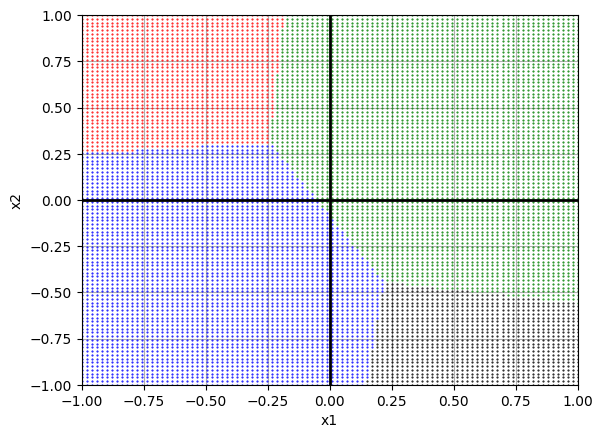

In [ ]:
num_of_samples = 100
(m, n) = X.shape

x1_min = -1.
x1_max = 1.
x2_min = -1.
x2_max = 1.

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = x1[i]
    X_new[i*num_of_samples + j, 1] = x2[j]

Y_hat = multi_classifier_predict(X_new, theta)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
plt.plot(X_new[Y_hat == 1][:, 0], X_new[Y_hat == 1][:, 1], 'g.', markersize = 1)
plt.plot(X_new[Y_hat == 2][:, 0], X_new[Y_hat == 2][:, 1], 'r.', markersize = 1)
plt.plot(X_new[Y_hat == 3][:, 0], X_new[Y_hat == 3][:, 1], 'b.', markersize = 1)
plt.plot(X_new[Y_hat == 4][:, 0], X_new[Y_hat == 4][:, 1], 'k.', markersize = 1)

plt.plot([-1, 1], [0, 0], 'k', linewidth = 2)
plt.plot([0, 0], [-1, 1], 'k', linewidth = 2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



> 위와 같은 결과가 나타난 이유가 무엇일까??



In [ ]:
## Generate Dataset
X = np.array([])
x1 = np.linspace(0,1,100).reshape((100, 1))
x2 = np.linspace(0,1,100).reshape((100, 1))
X = np.c_[x1, x2]
X = np.r_[X, np.c_[-x1, x2]]
X = np.r_[X, np.c_[-x1, -x2]]
X = np.r_[X, np.c_[x1, -x2]]
Y = np.r_[np.ones(100), np.ones(100)*2, np.ones(100)*3, np.ones(100)*4].reshape((400, 1))

## One-Hot Encoding
Y_ = np.zeros((400,4))
for i in range(400):
  Y_[i, (Y[i]-1).astype(int)] = 1

## theta initialization
m, n = X.shape      # m : num of data / n : num of dim
k = len(Y_[1,:])    # k : num of class
theta = np.random.randn(n + 1, k)

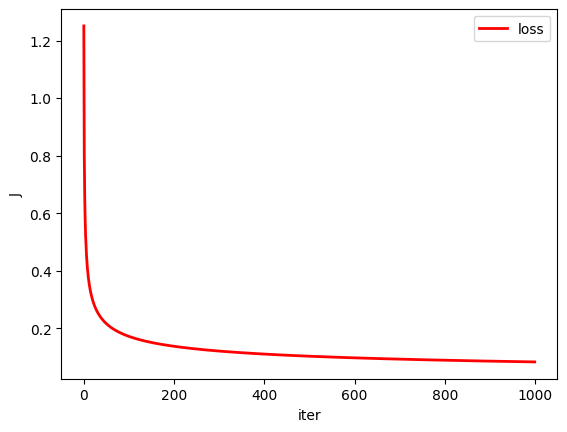

In [ ]:
J_hist = []
for i in range(1000):
  # compute cross entrophy
  J = cross_entropy(X, Y_, theta)
  J_hist.append(J)

  # compute error = Y_hat - Y_
  Y_hat = softmax(X @ theta[1:] + theta[0])
  error = Y_hat - Y_

  # gradient descent rule
  gradient_bias = np.ones((m,1)).T @ error
  gradient_theta = X.T @ error
  gradient = np.r_[gradient_bias, gradient_theta]
  theta = theta - 0.01 * gradient

plt.plot(J_hist, 'r', linewidth = 2, label = "loss")
plt.xlabel("iter")
plt.ylabel("J")
plt.legend()
plt.show()

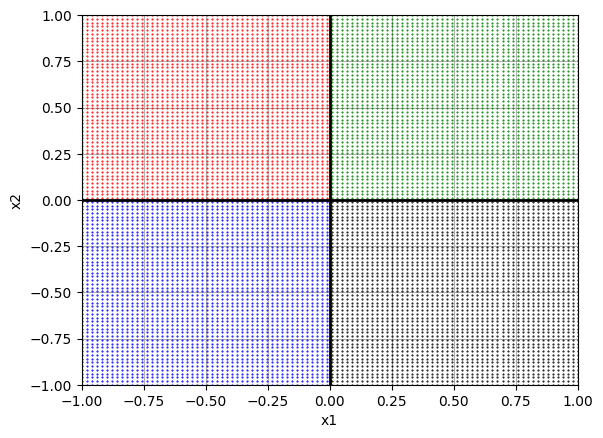

In [ ]:
num_of_samples = 100
(m, n) = X.shape

x1_min = -1.
x1_max = 1.
x2_min = -1.
x2_max = 1.

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples**2 , n))
for i in range(num_of_samples):
  for j in range(num_of_samples):
    X_new[i*num_of_samples + j, 0] = x1[i]
    X_new[i*num_of_samples + j, 1] = x2[j]

Y_hat = multi_classifier_predict(X_new, theta)
Y_hat = np.reshape(Y_hat, (num_of_samples**2))
plt.plot(X_new[Y_hat == 1][:, 0], X_new[Y_hat == 1][:, 1], 'g.', markersize = 1)
plt.plot(X_new[Y_hat == 2][:, 0], X_new[Y_hat == 2][:, 1], 'r.', markersize = 1)
plt.plot(X_new[Y_hat == 3][:, 0], X_new[Y_hat == 3][:, 1], 'b.', markersize = 1)
plt.plot(X_new[Y_hat == 4][:, 0], X_new[Y_hat == 4][:, 1], 'k.', markersize = 1)

plt.plot([-1, 1], [0, 0], 'k', linewidth = 2)
plt.plot([0, 0], [-1, 1], 'k', linewidth = 2)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()